### Execute the cell below before proceeding.

The code in this cell will download three files, one with a Python script and two with a jpg images, from the Internet. Make sure that you have a network connection before executing it.  

In [1]:
import requests
with open("magritte.jpg", "wb") as f:
    f.write(requests.get("https://raw.githubusercontent.com/bbadzioch/MTH309_F2019/master/notebooks_2024/magritte.jpg").content)
with open("mural.jpg", "wb") as f:
    f.write(requests.get("https://raw.githubusercontent.com/bbadzioch/MTH309_F2019/master/notebooks_2024/mural.jpg").content)
with open("perspective.py", "w") as f:
    f.write(requests.get("https://raw.githubusercontent.com/bbadzioch/MTH309_F2019/master/notebooks_2024/perspective.py").text)
from perspective import *

# Perspective tutorial

The perspective extra credit assignment asks you to paste an image into an area of another image in a way that applies an appropriate perspective adjustment. This notebook describes how to accomplish it. As an example we will be working with a two image files, `mural.jpg` and `magritte.jpg`. The code cell above downloads these files. Make sure that you have executed it before proceeding. 

The code below reads the two image files and assigns their content variables:

In [2]:
#read the mural.jpg file
mural = plt.imread("mural.jpg")

#read the magritte.jpg file
magritte = plt.imread("magritte.jpg")

Below we display the first image: 

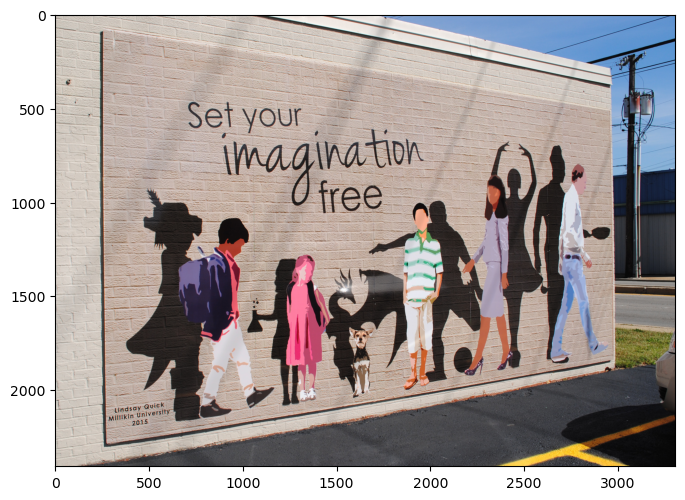

In [3]:
# this sets the width and height of the displayed image 
plt.figure(figsize = (8,6)) 

#show the image
plt.imshow(mural)
plt.show()

Our goal will be to replace the mural depicted on this image with the second image, which is a painting by Ren&eacute; Magritte:

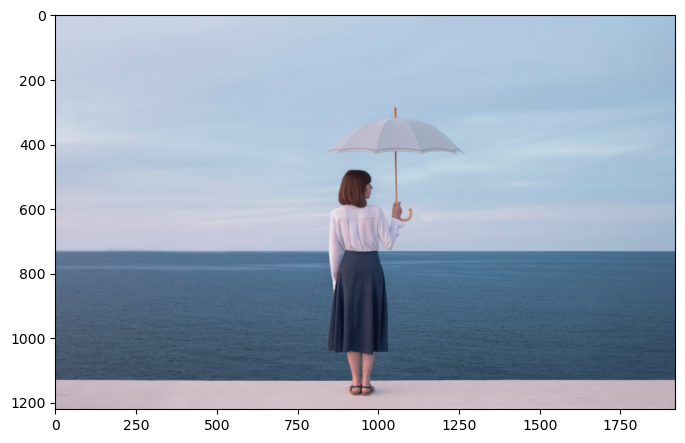

In [4]:
# this sets the width and height of the displayed image 
plt.figure(figsize = (8,6)) 

#show the image
plt.imshow(magritte)
plt.show()

In order to correctly paste the painting into the image of the mural, we will need to compute the change of basis matrix from the mural coordinates to the camera coordinates. For this purpose we need to know pixel coordinates of the corners of the mural in the mural image. The following command will be helpful, since it turns on an interactive displays of images showing pixel coordinates:

In [5]:
%matplotlib tk

Once the above command is executed all images will be shown in a separate window, in an interactive mode:

In [6]:
#set the width and height of the displayed image 

plt.figure(figsize = (8,5)) 

#show the image
plt.imshow(mural)
plt.show()

<p></p>
When the cursor is on the image, x and y coordinates of the pixel under the cursor are displayed under the image, on the right side. The three numbers in the square brackets describe the color of the pixel (which will not be needed here).

<img src="https://git.io/JeEY0" style="width:500pt;  box-shadow: 0 4px 6px 0 rgba(0, 0, 0, 0.2), 0 6px 6px 0 rgba(0, 0, 0, 0.19); ">


<p></p>

Using the interactive image display we get the following approximate coordinates of the mural corners (rounded to the nearest integers):


|    <i></i>      | **x** | **y** |
|-----------------|-------|-------|
| **upper left**  | 258   | 72    |
| **upper right** | 2958  | 514   |
| **lower left**  | 274   | 2291  |
| **lower right** | 2975  | 1839  |


Using the above data we can compute the change of coordinates matrix from the mural coordinates to the camera coordinates. The procedure for doing it was explained in class. The change of coordinates matrix obtained as the result of these computations is as follows (all matrix entries are rounded to 3 decimal points, which for this application is precise enough):

In [7]:
P = Matrix([[0.599, 0.403, -0.002], [154.626, 2811.541, 8.832], [43.151, 472.276, 1323.580]])
P

⎡ 0.599    0.403    -0.002 ⎤
⎢                          ⎥
⎢154.626  2811.541   8.832 ⎥
⎢                          ⎥
⎣43.151   472.276   1323.58⎦

The last step is to use the function `paste_image()` which pastes one image into an area of another image. This function takes three arguments:

- `background` = the name of the background image file
- `foreground` = the name of the image file which we want paste into the background image
- `coord_change` = the change of coordinates matrix from the background image coordinates to the camera coordinates.

In our case the `background` image file is `mural.jpg`, the `foreground` file is `magritte.jpg`, and the `coord_change` is the matrix `P` given above. Notice that names of both image files must be entered in quotes:

In [8]:
new_image = paste_image(background="mural.jpg", foreground="magritte.jpg", coord_change = P)

It remains to display the image computed above:

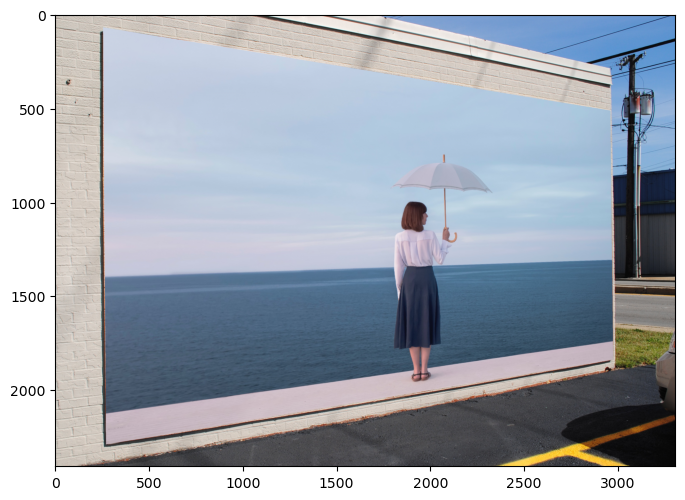

In [9]:
%matplotlib inline

#set the width and height of the displayed image 
plt.figure(figsize = (8,6)) 

#show the image
plt.imshow(new_image)
plt.show()